<a href="https://colab.research.google.com/github/Tharani-Ponnada/Loan-Approval---SOC/blob/main/Loan_Approval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loan Approval Prediction 

This is a binary classification problem, here we are predicting whether a person gets loan from a bank or not by taking some details of the person. 
Here we test various models but finally takes a model which gives us more accuracy. 

## Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline 
import io
import plotly.express as px

import plotly.express as px
import plotly.figure_factory as ff
import plotly

from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler , MinMaxScaler
from collections import Counter

#Classifiers
from sklearn.ensemble import AdaBoostClassifier , GradientBoostingClassifier , VotingClassifier , RandomForestClassifier
from sklearn.linear_model import LogisticRegression , RidgeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier 
from sklearn.naive_bayes import GaussianNB
from xgboost import plot_importance
from xgboost import XGBClassifier
from sklearn.svm import SVC

#Model evaluation tools
from sklearn.metrics import classification_report , accuracy_score , confusion_matrix
from sklearn.metrics import accuracy_score,f1_score
from sklearn.model_selection import cross_val_score

#Data processing functions
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()


from google.colab import data_table
data_table.enable_dataframe_formatter()

import warnings
warnings.filterwarnings("ignore")

## Uploading Data

Loading the data 

In [ ]:
from google.colab import files
 
uploaded = files.upload()
df = pd.read_csv(io.BytesIO(uploaded['loan.csv']))

Saving loan.csv to loan.csv


## Data Analysing 

Lets analyse the data by plotting the graphs knowing number of rows number of missing values and knowing the relationship between the variables 

In [ ]:
print(len(df))

614


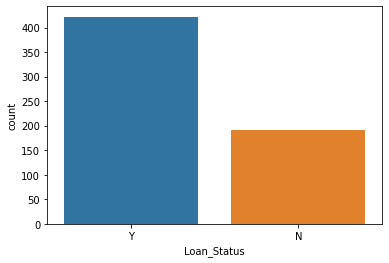

In [ ]:
sns.countplot("Loan_Status",data = df)

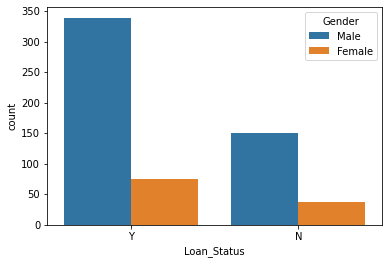

In [ ]:
sns.countplot('Loan_Status',hue = 'Gender',data = df)

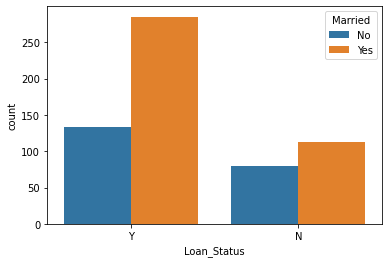

In [ ]:
sns.countplot('Loan_Status',hue = 'Married',data = df)

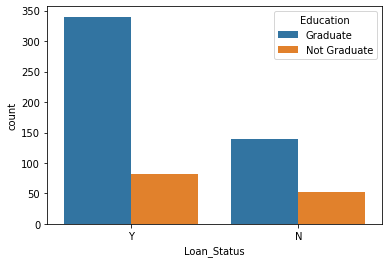

In [ ]:
sns.countplot('Loan_Status',hue = 'Education',data = df)

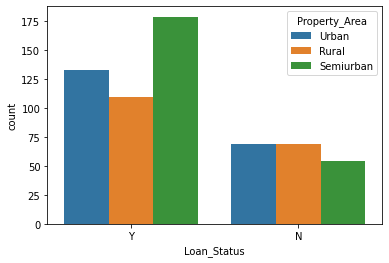

In [ ]:
sns.countplot('Loan_Status',hue = 'Property_Area',data = df)

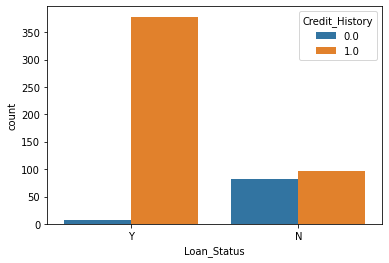

In [ ]:
sns.countplot('Loan_Status',hue = 'Credit_History',data = df)

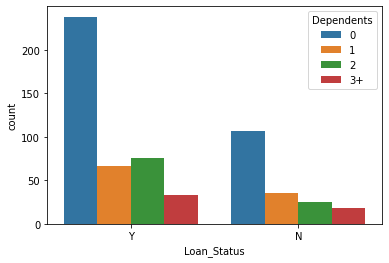

In [ ]:
sns.countplot('Loan_Status',hue = 'Dependents',data = df)

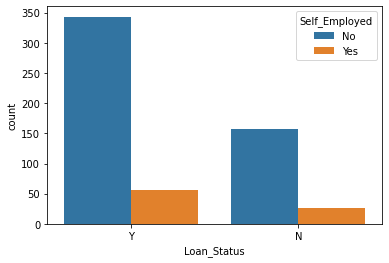

In [ ]:
sns.countplot('Loan_Status',hue = 'Self_Employed',data = df)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


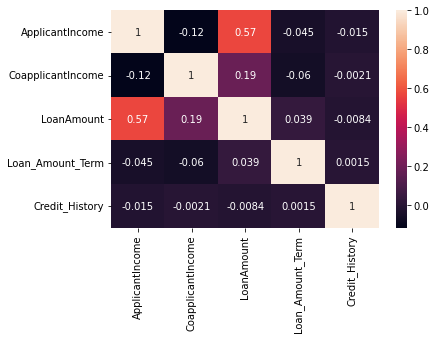

In [ ]:
sns.heatmap(df.corr(), annot=True)

In [ ]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


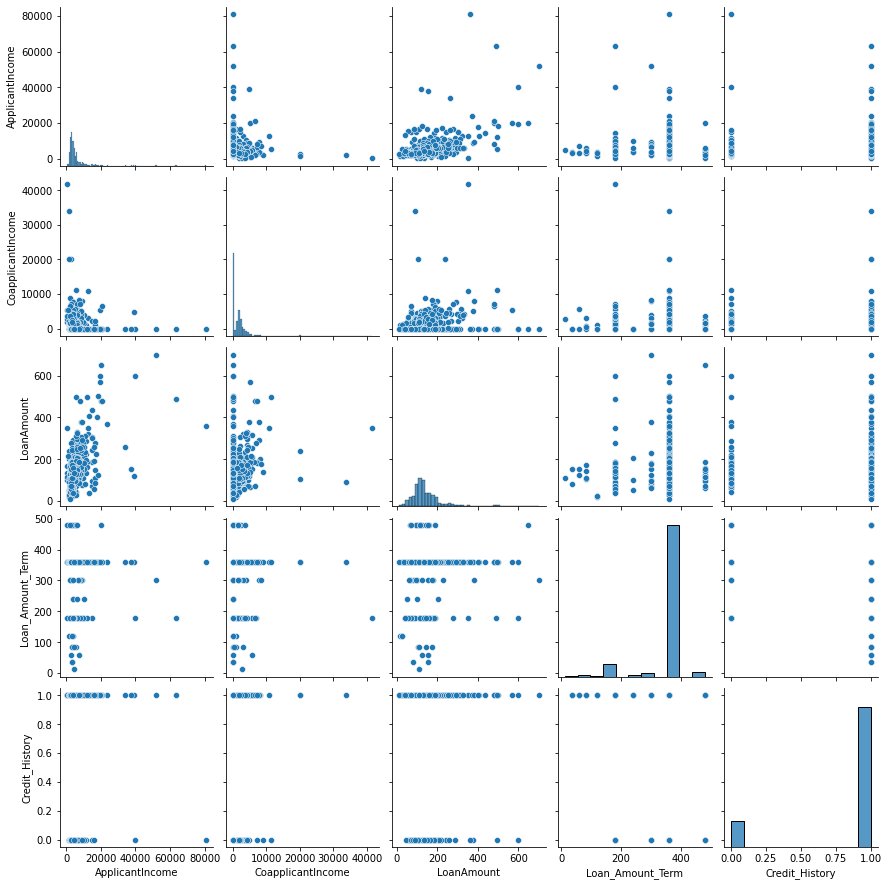

In [ ]:
sns.pairplot(df)

We can see that there are outliers in the datset 

Outliers are the values that look different from the other values in the data. Below is a plot highlighting the outliers in ‘red’ and outliers can be seen in both the extremes of data. Outliers in the data may causes problems during model fitting. Outliers may inflate the error metrics which give higher weights to large errors.

Here Outliers are present in labels ApplicantIncome and CoapplicantIncome, there are outliers in the categorical labels tooo


##Normalisation 
Central limit theorem In simple language we can say that maximum amount of data or maximum number of data points are near the Mean of the all data points.
To validate he normal distribution of the data:- Mean Mode Median are Equal.
We can gen identified the distribution of entire data with the help of Mean and Standard Deviation. When the data is normally distributed maximum data is centralized near the mean value of the data. To get understanding of distribtuion we can simply plot Distribution plot i.e. Simple Histogram.
Normally Distributed data represents a Bell Shaped curve. Also Mean, Mode , Median on Normaly Distributed data are equal. One more method is to calculate mean which should be 0 or near to 0 and Standard deviation 1 or near 1.  Normalization is generally required when we are dealing with attributes on a different scale, otherwise, it may lead to a dilution in the effectiveness of an important equally important attribute(on a lower scale) because of other attributes having values on a larger scale. In simple words, when multiple attributes are there but attributes have values on different scales, this may lead to poor data models while performing data mining operations. So they are normalized to bring all the attributes on the same scale. 

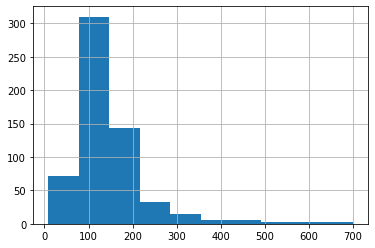

In [ ]:
df.LoanAmount.hist()

This shows LoanAmount does not fit in Normal Distribution 

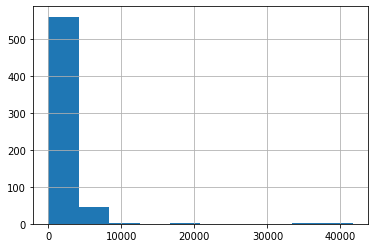

In [ ]:
df.CoapplicantIncome.hist()

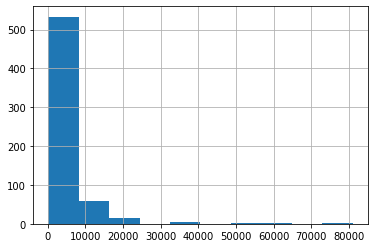

In [ ]:
df.ApplicantIncome.hist()

So after observing the graphs we have concluded that we need to normalize the data as they are skewed, So for numerical labels we normalize that column 

## Data Wrangling 

Here we prepare the data for modeling that is normalise the data, filling the null values, removing the outliers, removing skewness

In [ ]:
df.isnull().sum() 

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

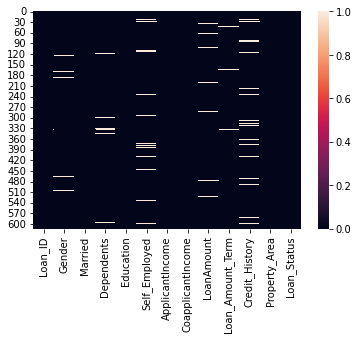

In [ ]:
sns.heatmap(df.isnull())

So if we look the above graph we can see that there are some missing values in the data, so we need to either impute the data or just drop the rows which have null/na values but if we do that we will loose a lot of data and also with less data model which we obtain will be robust, so we will try to impute those that is replace null/na with a value.

If we see in the data we have two types of labels one is numerical and the other is categorical. There are many ways of imputing, we can either replace the null/na values with the mean value of that column or mode of that column but this does not make any sense for categorical labels, so for categorical labels we replace it with most frequent value in that column or this also makes sense that filling the value of next row in that corresponding column. 

### Categorical Labels

Here we are filling the values of the categorical labels and we fill it by the most frequently occurred value in that column because they are ordinal not numerical

In [ ]:
df["Gender"].fillna(df["Gender"].mode()[0],inplace=True)
df["Married"].fillna(df["Married"].mode()[0],inplace=True)
df["Self_Employed"].fillna(df["Self_Employed"].mode()[0],inplace=True)
df["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].mode()[0],inplace=True)
df["Dependents"].fillna(df["Dependents"].mode()[0],inplace=True)
df["Credit_History"].fillna(df["Credit_History"].mode()[0],inplace=True)

In [ ]:
#All values of "Dependents" columns were of "str" form now converting to "int" form.
df["Dependents"] = df["Dependents"].replace('3+',int(3))
df["Dependents"] = df["Dependents"].replace('1',int(1))
df["Dependents"] = df["Dependents"].replace('2',int(2))
df["Dependents"] = df["Dependents"].replace('0',int(0))

In [ ]:
# for numerical label replacing with the mean

df["LoanAmount"].fillna(df["LoanAmount"].mean(),inplace=True)

# check out for median tooo 

In [ ]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

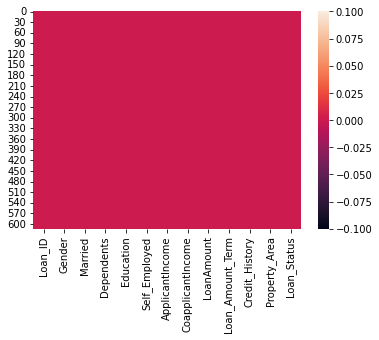

In [ ]:
sns.heatmap(df.isnull())

We can see that there are no null values in the data set right now 

Now normalising the data

In [ ]:
df["ApplicantIncome"] = np.log(df["ApplicantIncome"])
#As "CoapplicantIncome" columns has some "0" values we will get log values except "0"
df["CoapplicantIncome"] = [np.log(i) if i!=0 else 0 for i in df["CoapplicantIncome"]]
df["LoanAmount"] = np.log(df["LoanAmount"])

If we see we have a lot of string values, so we have to convert them into categorical values in order to implement the logistic regression, so we convert the strings into some categorical variables(dummy variables), which can be done using pandas, while doing ML we have to take care of strings, from strings we can not predict anything so we have to encode the strings which we have done now 

In [ ]:
df["Gender"] = le.fit_transform(df["Gender"])
df["Married"] = le.fit_transform(df["Married"])
df["Education"] = le.fit_transform(df["Education"])
df["Self_Employed"] = le.fit_transform(df["Self_Employed"])
df["Property_Area"] = le.fit_transform(df["Property_Area"])
df["Loan_Status"] = le.fit_transform(df["Loan_Status"])


In [ ]:
df.drop("Loan_ID", axis =1)
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,8.674026,0.000000,4.986426,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,8.430109,7.318540,4.852030,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,8.006368,0.000000,4.189655,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,7.856707,7.765569,4.787492,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,8.699515,0.000000,4.948760,360.0,1.0,2,1


In [ ]:
dependents = df["Dependents"]
print(dependents)

0      0
1      1
2      0
3      0
4      0
      ..
609    0
610    3
611    1
612    2
613    0
Name: Dependents, Length: 614, dtype: int64


Now the data is normalised and also strings are encoded now the data is ready for training the model

## Feature Importance

In order to create best predictive model we need to best understand the available data and get most information from the data. In multivariate data it is important to understand the importance of varialbes and how much they are contributing towards the target variable. Such that we can remove unnecessary variables to increase model performance. Many times dataset consists of extra columns which do not identically serve information to classify the data. This leads in wrong assumption of model while training. To understand the importance of the data we are going to use Machine Learning classifiers and then will plot bar graph based on importance. Also XGBoost has built-in feature importance plotting tool which we are going to use. Using more than one classifier will increase the confidence on our assumption of which variables to keep and which to remove.

In [ ]:
#Dividing data into Input X variables and Target Y variable
X = df.drop(["Loan_Status","Loan_ID"],axis=1)
y = df["Loan_Status"]

Feature importance by XGBoost:

Gender : 0.051204063


Married : 0.03951264


Dependents : 0.03388747


Education : 0.0480825


Self_Employed : 0.025786212


ApplicantIncome : 0.04256763


CoapplicantIncome : 0.052825093


LoanAmount : 0.04665784


Loan_Amount_Term : 0.030101473


Credit_History : 0.5847656


Property_Area : 0.04460945




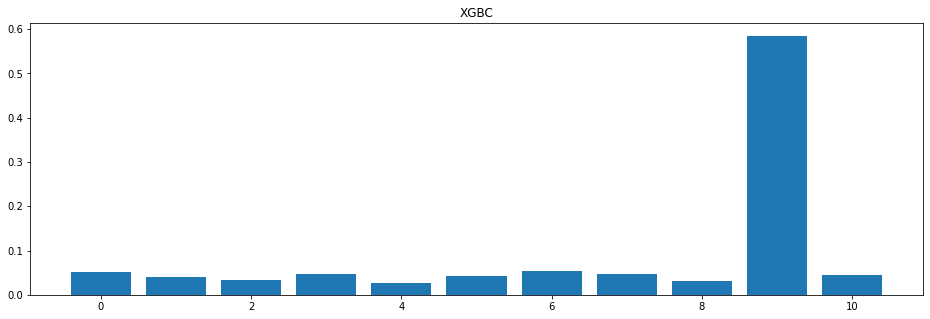

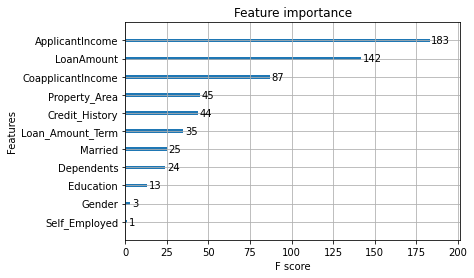

In [ ]:
print("Feature importance by XGBoost:\n")
XGBR = XGBClassifier()
XGBR.fit(X,y)
features = XGBR.feature_importances_
Columns = list(X.columns)
for i,j in enumerate(features):
    print(Columns[i],":",j)
    print("\n")
plt.figure(figsize=(16,5))
plt.title(label="XGBC")
plt.bar([x for x in range(len(features))],features)
plt.show()

plot_importance(XGBR)

Feature importance by Random Forest:

Gender -> 0.01822389451220961


Married -> 0.025020057743363945


Dependents -> 0.048149522315108564


Education -> 0.023459778624265636


Self_Employed -> 0.020296516295416078


ApplicantIncome -> 0.20459699530271658


CoapplicantIncome -> 0.12264309076528668


LoanAmount -> 0.18655046925634775


Loan_Amount_Term -> 0.04383023838046993


Credit_History -> 0.25795067597354926


Property_Area -> 0.04927876083126591




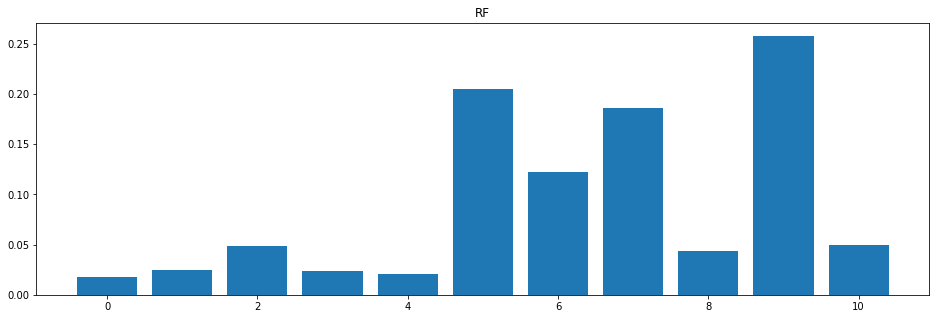

In [ ]:
print("Feature importance by Random Forest:\n")
RF = RandomForestClassifier()
RF.fit(X,y)
features = RF.feature_importances_
Columns = list(X.columns)
for i,j in enumerate(features):
    print(Columns[i],"->",j)
    print("\n")
plt.figure(figsize=(16,5))
plt.title(label="RF")
plt.bar([x for x in range(len(features))],features)
plt.show()

Feature importance by Decision Tree:

Gender : 0.016636825207393676


Married : 0.03707418054684433


Dependents : 0.054018074752865484


Education : 0.029952879523841697


Self_Employed : 0.038781537496515195


ApplicantIncome : 0.21128635066741716


CoapplicantIncome : 0.12258749061957967


LoanAmount : 0.1542498856053682


Loan_Amount_Term : 0.014912654156826397


Credit_History : 0.2922008668920113


Property_Area : 0.02829925453133704




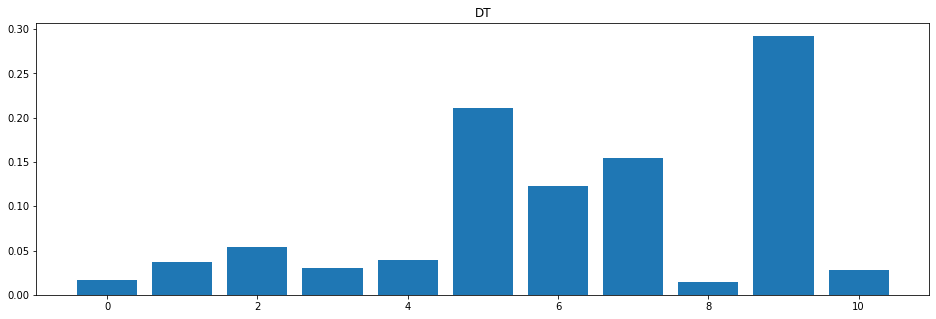

In [ ]:
print("Feature importance by Decision Tree:\n")
DT = DecisionTreeClassifier()
DT.fit(X,y)
features = DT.feature_importances_
Columns = list(X.columns)
for i,j in enumerate(features):
    print(Columns[i],":",j)
    print("\n")
plt.figure(figsize=(16,5))
plt.title(label="DT")
plt.bar([x for x in range(len(features))],features)
plt.show()

Feature importance by Suppoprt Vector Machine:

Gender : -0.001811934484730493


Married : 0.007487651608078849


Dependents : 0.0052430217717969185


Education : -0.00604162119865137


Self_Employed : 0.0018119344847518093


ApplicantIncome : 0.005549602227112871


CoapplicantIncome : 0.000752630268774368


LoanAmount : -0.01305614633934482


Loan_Amount_Term : 8.874054947227705e-05


Credit_History : 2.08055549411758


Property_Area : -0.0018702018746949989




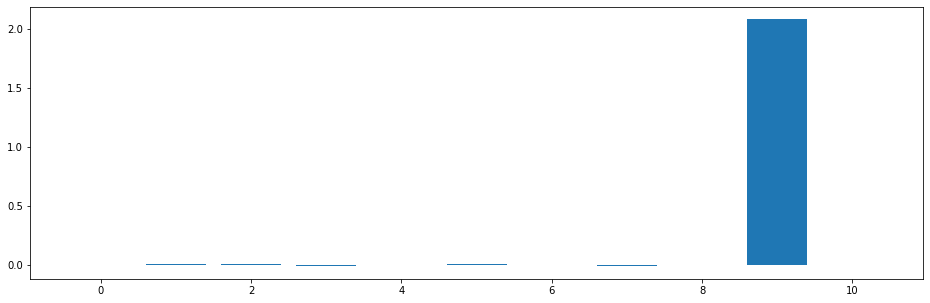

In [ ]:
print("Feature importance by Suppoprt Vector Machine:\n")
SVM = SVC(kernel="linear")
SVM.fit(X,y)
features = SVM.coef_[0]
Columns = list(X.columns)
for i,j in enumerate(features):
    print(Columns[i],":",j)
    print("\n")
plt.figure(figsize=(16,5))
plt.bar([x for x in range(len(features))],features)
plt.show()

Feature importance by Logistic Regression:

Gender : -0.16303972790479157


Married : 0.45484440784727764


Dependents : 0.04701961689944757


Education : -0.4269474507002776


Self_Employed : 0.04941691564923764


ApplicantIncome : 0.11510638513821161


CoapplicantIncome : 0.04462222462395291


LoanAmount : -0.5742823866697617


Loan_Amount_Term : -0.0010292370932304547


Credit_History : 3.246932636595751


Property_Area : 0.0737919890954136




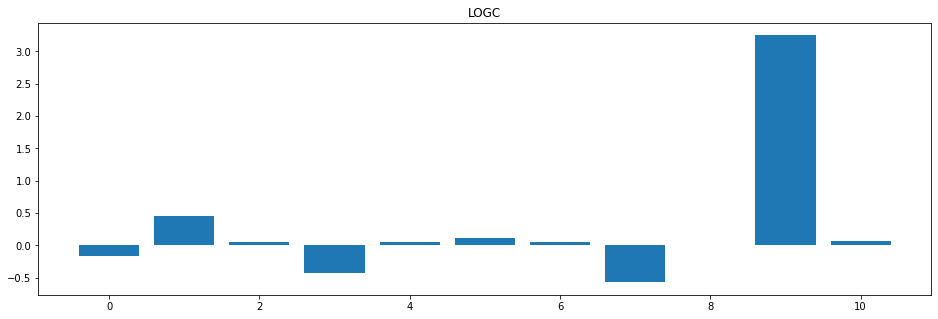

In [ ]:
print("Feature importance by Logistic Regression:\n")
LOGC = LogisticRegression()
LOGC.fit(X,y)
features = LOGC.coef_[0]
Columns = list(X.columns)
for i,j in enumerate(features):
    print(Columns[i],":",j)
    print("\n")
plt.figure(figsize=(16,5))
plt.title(label="LOGC")
plt.bar([x for x in range(len(features))],features)
plt.show()

So from the feature importance we can see that Credit History, ApplicantIncome, CoapplicantIncome, LoanAmount are the most important features

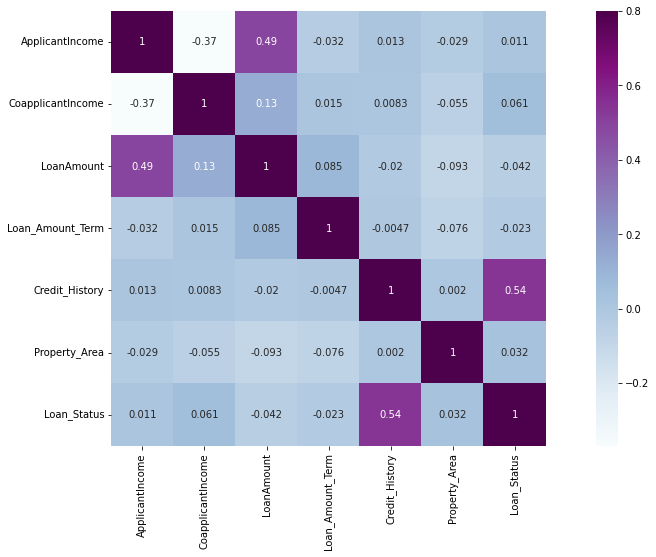

In [ ]:
#Heat map of dataset with relative importance
matrix = df.drop(["Gender","Married","Dependents","Education","Self_Employed"],axis=1).corr()


plt.figure(figsize=(18,8))
sns.heatmap(matrix,vmax=0.8,square=True,cmap="BuPu", annot = True)

It seems Application income and Loan Amount is correlated , also Coapplication income correlated with Loan Aount then Credit history is corrleated with Loan Status

In [ ]:
A = list(df.Loan_Status).count(1)
B = list(df.Loan_Status).count(0)
print("Count of 1 (Approved) : ",A,"\nCount of 0 (Rejected) : ",B)

Count of 1 (Approved) :  422 
Count of 0 (Rejected) :  192


It seems that data is highly Imbalanced. When the target classes does not have equal count then the data is considered as imbalanced data. From above graph it seems that dataset contains more records with Approved Loan_Status than Rejected Loan_Status. 422 over 192 If data would have maximum of 20-30 records difference that time this imabalnced would be ignorable. Which will lead to make wrong assumptions by model and also model will be biased after training. We will overcome this issue by balancing the data. To overcome this problem we will balance the data using resampling technique with Upsample and Downsample.

In [ ]:
data = df.copy()
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,8.674026,0.000000,4.986426,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,8.430109,7.318540,4.852030,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,8.006368,0.000000,4.189655,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,7.856707,7.765569,4.787492,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,8.699515,0.000000,4.948760,360.0,1.0,2,1


In [ ]:
#Getting seperated data with 1 and 0 status.
df_majority = data[data.Loan_Status==1]
df_minority = data[data.Loan_Status==0]

#Here we are downsampling the Majority Class Data Points. 
#i.e. We will get equal amount of datapoint as Minority class from Majority class

df_majority_downsampled = resample(df_majority,replace=False,n_samples=192,random_state=123)
df_downsampled = pd.concat([df_majority_downsampled,df_minority])
print("Downsampled data: \n",df_downsampled.Loan_Status.value_counts())
print("\n")
#Here we are upsampling the Minority Class Data Points. 
#i.e. We will get equal amount of datapoint as Majority class from Minority class
df_minority_upsampled = resample(df_minority,replace=True,n_samples=422,random_state=123)
df_upsampled = pd.concat([df_majority,df_minority_upsampled])
print("Upsampled data: \n",df_upsampled.Loan_Status.value_counts())

Downsampled data: 
 1    192
0    192
Name: Loan_Status, dtype: int64


Upsampled data: 
 1    422
0    422
Name: Loan_Status, dtype: int64


## Modeling 

In order to gain maximum posible accuracy one needs to conduct more experiments.

We will pass data one by one with different state i.e.

-Only Scaled data

-Scaled + Down Sampled Data

-Scaled + Up Sampled Data

-Scaled + Up Sampled Data + Selected feature with respective importance.

### Experiment1 Only Scaled Data 


In [ ]:
new_data = df.copy()

In [ ]:
X = new_data.drop(["Loan_Status","Loan_ID"],axis=1)
y = new_data["Loan_Status"]

In [ ]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [ ]:
#Scaling data 

StSc = StandardScaler()
X_train  = StSc.fit_transform(X_train)
X_test  = StSc.fit_transform(X_test)


In [ ]:
#Voting ensemble method. Combining all tree based algorithms.
models = []
models.append(("XGB",XGBClassifier()))
models.append(("RF",RandomForestClassifier()))
models.append(("DT",DecisionTreeClassifier()))
models.append(("ADB",AdaBoostClassifier()))
models.append(("GB",GradientBoostingClassifier()))

In [ ]:
ensemble = VotingClassifier(estimators=models)
ensemble.fit(X_train,y_train)
y_pred = ensemble.predict(X_test) 
print(classification_report(y_pred,y_test))
print("Voting Ensemble: ",accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.44      0.83      0.58        23
           1       0.96      0.82      0.88       131

    accuracy                           0.82       154
   macro avg       0.70      0.82      0.73       154
weighted avg       0.89      0.82      0.84       154

Voting Ensemble:  0.8181818181818182


In [ ]:
SVM = SVC(kernel="linear",class_weight="balanced",probability=True)
SVM.fit(X_train,y_train)
y_pred = SVM.predict(X_test)
print(classification_report(y_pred,y_test))
print("SVM: ",accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.44      0.90      0.59        21
           1       0.98      0.82      0.89       133

    accuracy                           0.83       154
   macro avg       0.71      0.86      0.74       154
weighted avg       0.91      0.83      0.85       154

SVM:  0.8311688311688312


In [ ]:
XGBC = XGBClassifier(learning_rate =0.1,n_estimators=10000,max_depth=4,min_child_weight=6,gamma=0,subsample=0.6,colsample_bytree=0.8,reg_alpha=0.005, objective= 'binary:logistic', nthread=2, scale_pos_weight=1, seed=27)
XGBC.fit(X_train,y_train)
y_pred = XGBC.predict(X_test)
print(classification_report(y_pred,y_test))
print("XGBoost: ",accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.23      0.34      0.28        29
           1       0.83      0.74      0.78       125

    accuracy                           0.66       154
   macro avg       0.53      0.54      0.53       154
weighted avg       0.72      0.66      0.69       154

XGBoost:  0.6623376623376623


In [ ]:
Model1 = RandomForestClassifier(n_estimators=1000,random_state=0,n_jobs=1000,max_depth=70,bootstrap=True)
Model1.fit(X_train,y_train)
y_pred = Model1.predict(X_test)
print(classification_report(y_pred,y_test))
print("RandomForestClassifier: ",accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.44      0.70      0.54        27
           1       0.93      0.81      0.87       127

    accuracy                           0.79       154
   macro avg       0.68      0.76      0.70       154
weighted avg       0.84      0.79      0.81       154

RandomForestClassifier:  0.7922077922077922


In [ ]:
Model2 = GradientBoostingClassifier()
Model2.fit(X_train,y_train)
y_pred = Model2.predict(X_test)
print(classification_report(y_pred,y_test))
print("GradientBoostingClassifier: ",accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.44      0.73      0.55        26
           1       0.94      0.81      0.87       128

    accuracy                           0.80       154
   macro avg       0.69      0.77      0.71       154
weighted avg       0.85      0.80      0.82       154

GradientBoostingClassifier:  0.7987012987012987


In [ ]:
Model3 = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=100,max_features=1.0, max_leaf_nodes=10,min_impurity_decrease=1e-07, min_samples_leaf=1,min_samples_split=2, min_weight_fraction_leaf=0.10, random_state=27, splitter='best')
Model3.fit(X_train,y_train)
y_pred = Model3.predict(X_test)
print(classification_report(y_pred,y_test))
print("DecisionTreeClassifier: ",accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.44      0.90      0.59        21
           1       0.98      0.82      0.89       133

    accuracy                           0.83       154
   macro avg       0.71      0.86      0.74       154
weighted avg       0.91      0.83      0.85       154

DecisionTreeClassifier:  0.8311688311688312


In [ ]:
Model4 = AdaBoostClassifier()
Model4.fit(X_train,y_train)
y_pred = Model4.predict(X_test)
print(classification_report(y_pred,y_test))
print("AdaBoostClassifier: ",accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.49      0.78      0.60        27
           1       0.95      0.83      0.88       127

    accuracy                           0.82       154
   macro avg       0.72      0.80      0.74       154
weighted avg       0.87      0.82      0.83       154

AdaBoostClassifier:  0.8181818181818182


In [ ]:
Model5 = LinearDiscriminantAnalysis()
Model5.fit(X_train,y_train)
y_pred = Model5.predict(X_test)
print(classification_report(y_pred,y_test))
print("LinearDiscriminantAnalysis: ",accuracy_score(y_pred,y_test),"\n")

              precision    recall  f1-score   support

           0       0.44      0.90      0.59        21
           1       0.98      0.82      0.89       133

    accuracy                           0.83       154
   macro avg       0.71      0.86      0.74       154
weighted avg       0.91      0.83      0.85       154

LinearDiscriminantAnalysis:  0.8311688311688312 



In [ ]:
KNN = KNeighborsClassifier(leaf_size=1,p=2,n_neighbors=20)
KNN.fit(X_train,y_train)
y_pred = KNN.predict(X_test)
print(classification_report(y_pred,y_test))
print("KNeighborsClassifier: ",accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.47      0.91      0.62        22
           1       0.98      0.83      0.90       132

    accuracy                           0.84       154
   macro avg       0.72      0.87      0.76       154
weighted avg       0.91      0.84      0.86       154

KNeighborsClassifier:  0.8376623376623377


In [ ]:
Model7 = GaussianNB()
Model7.fit(X_train,y_train)
y_pred = Model7.predict(X_test)
print(classification_report(y_pred,y_test))
print("GaussianNB: ",accuracy_score(y_pred,y_test))


              precision    recall  f1-score   support

           0       0.44      0.90      0.59        21
           1       0.98      0.82      0.89       133

    accuracy                           0.83       154
   macro avg       0.71      0.86      0.74       154
weighted avg       0.91      0.83      0.85       154

GaussianNB:  0.8311688311688312


In [ ]:
Model8 = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,penalty='l2', random_state=None, solver='liblinear', tol=0.0001,verbose=0, warm_start=False)
Model8.fit(X_train,y_train)
y_pred = Model8.predict(X_test)
print(classification_report(y_pred,y_test))
print("Logistic Regression: ",accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.44      0.90      0.59        21
           1       0.98      0.82      0.89       133

    accuracy                           0.83       154
   macro avg       0.71      0.86      0.74       154
weighted avg       0.91      0.83      0.85       154

Logistic Regression:  0.8311688311688312


## Experiment2 Scaled and Down Sampled Data


In [ ]:
X = df_downsampled.drop(["Loan_Status","Loan_ID"],axis=1)
y = df_downsampled.Loan_Status

In [ ]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.25,random_state=0)


In [ ]:
#Scaling data 

StSc = StandardScaler()
X_train  = StSc.fit_transform(X_train)
X_test  = StSc.fit_transform(X_test)


In [ ]:
models = []
models.append(("XGB",XGBClassifier()))
models.append(("RF",RandomForestClassifier()))
models.append(("DT",DecisionTreeClassifier()))
models.append(("ADB",AdaBoostClassifier()))
models.append(("GB",GradientBoostingClassifier()))

In [ ]:
ensemble = VotingClassifier(estimators=models)
ensemble.fit(X_train,y_train)
y_pred = ensemble.predict(X_test) 
print(classification_report(y_pred,y_test))
print("Voting Ensemble: ",accuracy_score(y_pred,y_test))


              precision    recall  f1-score   support

           0       0.56      0.77      0.65        35
           1       0.83      0.66      0.73        61

    accuracy                           0.70        96
   macro avg       0.70      0.71      0.69        96
weighted avg       0.73      0.70      0.70        96

Voting Ensemble:  0.6979166666666666


In [ ]:
SVM = SVC(kernel="linear",class_weight="balanced",probability=True)
SVM.fit(X_train,y_train)
y_pred = SVM.predict(X_test)
print(classification_report(y_pred,y_test))
print("SVM: ",accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.42      1.00      0.59        20
           1       1.00      0.63      0.77        76

    accuracy                           0.71        96
   macro avg       0.71      0.82      0.68        96
weighted avg       0.88      0.71      0.74        96

SVM:  0.7083333333333334


In [ ]:
XGBC = XGBClassifier(learning_rate =0.1,n_estimators=10000,max_depth=4,min_child_weight=6,gamma=0,subsample=0.6,colsample_bytree=0.8,reg_alpha=0.005, objective= 'binary:logistic', nthread=2, scale_pos_weight=1, seed=27)
XGBC.fit(X_train,y_train)
y_pred = XGBC.predict(X_test)
print(classification_report(y_pred,y_test))
print("XGBoost: ",accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.50      0.62      0.55        39
           1       0.69      0.58      0.63        57

    accuracy                           0.59        96
   macro avg       0.59      0.60      0.59        96
weighted avg       0.61      0.59      0.60        96

XGBoost:  0.59375


In [ ]:
Model1 = RandomForestClassifier(n_estimators=1000,random_state=0,n_jobs=1000,max_depth=70,bootstrap=True)
Model1.fit(X_train,y_train)
y_pred = Model1.predict(X_test)
print(classification_report(y_pred,y_test))
print("RandomForestClassifier: ",accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.54      0.74      0.63        35
           1       0.81      0.64      0.72        61

    accuracy                           0.68        96
   macro avg       0.68      0.69      0.67        96
weighted avg       0.71      0.68      0.68        96

RandomForestClassifier:  0.6770833333333334


In [ ]:
Model2 = GradientBoostingClassifier()
Model2.fit(X_train,y_train)
y_pred = Model2.predict(X_test)
print(classification_report(y_pred,y_test))
print("GradientBoostingClassifier: ",accuracy_score(y_pred,y_test))


              precision    recall  f1-score   support

           0       0.58      0.74      0.65        38
           1       0.79      0.66      0.72        58

    accuracy                           0.69        96
   macro avg       0.69      0.70      0.68        96
weighted avg       0.71      0.69      0.69        96

GradientBoostingClassifier:  0.6875


In [ ]:

Model3 = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=100,max_features=1.0, max_leaf_nodes=10,min_impurity_decrease=1e-07, min_samples_leaf=1,min_samples_split=2, min_weight_fraction_leaf=0.10, random_state=27, splitter='best')
Model3.fit(X_train,y_train)
y_pred = Model3.predict(X_test)
print(classification_report(y_pred,y_test))
print("DecisionTreeClassifier: ",accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.54      0.87      0.67        30
           1       0.92      0.67      0.77        66

    accuracy                           0.73        96
   macro avg       0.73      0.77      0.72        96
weighted avg       0.80      0.73      0.74        96

DecisionTreeClassifier:  0.7291666666666666


In [ ]:
Model4 = AdaBoostClassifier()
Model4.fit(X_train,y_train)
y_pred = Model4.predict(X_test)
print(classification_report(y_pred,y_test))
print("AdaBoostClassifier: ",accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.60      0.85      0.71        34
           1       0.90      0.69      0.78        62

    accuracy                           0.75        96
   macro avg       0.75      0.77      0.74        96
weighted avg       0.79      0.75      0.76        96

AdaBoostClassifier:  0.75


In [ ]:
Model5 = LinearDiscriminantAnalysis()
Model5.fit(X_train,y_train)
y_pred = Model5.predict(X_test)
print(classification_report(y_pred,y_test))
print("LinearDiscriminantAnalysis: ",accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.52      0.78      0.62        32
           1       0.85      0.64      0.73        64

    accuracy                           0.69        96
   macro avg       0.69      0.71      0.68        96
weighted avg       0.74      0.69      0.70        96

LinearDiscriminantAnalysis:  0.6875


In [ ]:
KNN = KNeighborsClassifier(leaf_size=1,p=2,n_neighbors=20)
KNN.fit(X_train,y_train)
y_pred = KNN.predict(X_test)
print(classification_report(y_pred,y_test))
print("KNeighborsClassifier: ",accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.50      0.83      0.62        29
           1       0.90      0.64      0.75        67

    accuracy                           0.70        96
   macro avg       0.70      0.73      0.69        96
weighted avg       0.78      0.70      0.71        96

KNeighborsClassifier:  0.6979166666666666


In [ ]:
Model7 = GaussianNB()
Model7.fit(X_train,y_train)
y_pred = Model7.predict(X_test)
print(classification_report(y_pred,y_test))
print("GaussianNB: ",accuracy_score(y_pred,y_test))


              precision    recall  f1-score   support

           0       0.42      0.91      0.57        22
           1       0.96      0.62      0.75        74

    accuracy                           0.69        96
   macro avg       0.69      0.77      0.66        96
weighted avg       0.83      0.69      0.71        96

GaussianNB:  0.6875


In [ ]:
Model8 = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,penalty='l2', random_state=None, solver='liblinear', tol=0.0001,verbose=0, warm_start=False)
Model8.fit(X_train,y_train)
y_pred = Model8.predict(X_test)
print(classification_report(y_pred,y_test))
print("Logistic Regression: ",accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.54      0.74      0.63        35
           1       0.81      0.64      0.72        61

    accuracy                           0.68        96
   macro avg       0.68      0.69      0.67        96
weighted avg       0.71      0.68      0.68        96

Logistic Regression:  0.6770833333333334


## Experiment3 Scaled and Up Sampled Data 

In [ ]:
X = df_upsampled.drop(["Loan_Status","Loan_ID"],axis=1)
y = df_upsampled.Loan_Status

In [ ]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [ ]:
#Scaling data 

StSc = StandardScaler()
X_train  = StSc.fit_transform(X_train)
X_test  = StSc.fit_transform(X_test)

In [ ]:
models = []
models.append(("XGB",XGBClassifier()))
models.append(("RF",RandomForestClassifier()))
models.append(("DT",DecisionTreeClassifier()))
models.append(("ADB",AdaBoostClassifier()))
models.append(("GB",GradientBoostingClassifier()))

In [ ]:
ensemble = VotingClassifier(estimators=models)
ensemble.fit(X_train,y_train)
y_pred = ensemble.predict(X_test) 
print(classification_report(y_pred,y_test))
print("Voting Ensemble: ",accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.69      0.84      0.76        88
           1       0.86      0.72      0.79       123

    accuracy                           0.77       211
   macro avg       0.77      0.78      0.77       211
weighted avg       0.79      0.77      0.77       211

Voting Ensemble:  0.7725118483412322


In [ ]:
SVM = SVC(kernel="linear",class_weight="balanced",probability=True)
SVM.fit(X_train,y_train)
y_pred = SVM.predict(X_test)
print(classification_report(y_pred,y_test))
print("SVM: ",accuracy_score(y_pred,y_test))


              precision    recall  f1-score   support

           0       0.38      0.95      0.54        43
           1       0.98      0.60      0.75       168

    accuracy                           0.67       211
   macro avg       0.68      0.78      0.64       211
weighted avg       0.86      0.67      0.70       211

SVM:  0.6729857819905213


In [ ]:
XGBC = XGBClassifier(learning_rate =0.1,n_estimators=10000,max_depth=4,min_child_weight=6,gamma=0,subsample=0.6,colsample_bytree=0.8,reg_alpha=0.005, objective= 'binary:logistic', nthread=2, scale_pos_weight=1, seed=27)
XGBC.fit(X_train,y_train)
y_pred = XGBC.predict(X_test)
print(classification_report(y_pred,y_test))
print("XGBoost: ",accuracy_score(y_pred,y_test))


              precision    recall  f1-score   support

           0       0.68      0.74      0.71        99
           1       0.75      0.69      0.72       112

    accuracy                           0.71       211
   macro avg       0.71      0.71      0.71       211
weighted avg       0.71      0.71      0.71       211

XGBoost:  0.7109004739336493


In [ ]:
Model1 = RandomForestClassifier(n_estimators=1000,random_state=0,n_jobs=1000,max_depth=70,bootstrap=True)
Model1.fit(X_train,y_train)
y_pred = Model1.predict(X_test)
print(classification_report(y_pred,y_test))
print("RandomForestClassifier: ",accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.77      0.86      0.81        96
           1       0.87      0.78      0.83       115

    accuracy                           0.82       211
   macro avg       0.82      0.82      0.82       211
weighted avg       0.83      0.82      0.82       211

RandomForestClassifier:  0.8199052132701422


In [ ]:
Model2 = GradientBoostingClassifier()
Model2.fit(X_train,y_train)
y_pred = Model2.predict(X_test)
print(classification_report(y_pred,y_test))
print("GradientBoostingClassifier: ",accuracy_score(y_pred,y_test))


              precision    recall  f1-score   support

           0       0.60      0.80      0.69        81
           1       0.84      0.67      0.75       130

    accuracy                           0.72       211
   macro avg       0.72      0.74      0.72       211
weighted avg       0.75      0.72      0.72       211

GradientBoostingClassifier:  0.7203791469194313


In [ ]:
Model3 = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=100,max_features=1.0, max_leaf_nodes=10,min_impurity_decrease=1e-07, min_samples_leaf=1,min_samples_split=2, min_weight_fraction_leaf=0.10, random_state=27, splitter='best')
Model3.fit(X_train,y_train)
y_pred = Model3.predict(X_test)
print(classification_report(y_pred,y_test))
print("DecisionTreeClassifier: ",accuracy_score(y_pred,y_test))


              precision    recall  f1-score   support

           0       0.56      0.72      0.63        83
           1       0.78      0.62      0.69       128

    accuracy                           0.66       211
   macro avg       0.67      0.67      0.66       211
weighted avg       0.69      0.66      0.67       211

DecisionTreeClassifier:  0.6635071090047393


In [ ]:
Model4 = AdaBoostClassifier()
Model4.fit(X_train,y_train)
y_pred = Model4.predict(X_test)
print(classification_report(y_pred,y_test))
print("AdaBoostClassifier: ",accuracy_score(y_pred,y_test))


              precision    recall  f1-score   support

           0       0.66      0.79      0.72        90
           1       0.82      0.69      0.75       121

    accuracy                           0.73       211
   macro avg       0.74      0.74      0.73       211
weighted avg       0.75      0.73      0.74       211

AdaBoostClassifier:  0.7345971563981043


In [ ]:
Model5 = LinearDiscriminantAnalysis()
Model5.fit(X_train,y_train)
y_pred = Model5.predict(X_test)
print(classification_report(y_pred,y_test))
print("LinearDiscriminantAnalysis: ",accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.44      0.78      0.56        60
           1       0.87      0.60      0.71       151

    accuracy                           0.65       211
   macro avg       0.65      0.69      0.63       211
weighted avg       0.75      0.65      0.67       211

LinearDiscriminantAnalysis:  0.6492890995260664


In [ ]:
KNN = KNeighborsClassifier(leaf_size=1,p=2,n_neighbors=20)
KNN.fit(X_train,y_train)
y_pred = KNN.predict(X_test)
print(classification_report(y_pred,y_test))
print("KNeighborsClassifier: ",accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.54      0.81      0.64        72
           1       0.86      0.64      0.74       139

    accuracy                           0.70       211
   macro avg       0.70      0.72      0.69       211
weighted avg       0.75      0.70      0.70       211

KNeighborsClassifier:  0.6966824644549763


In [ ]:
Model7 = GaussianNB()
Model7.fit(X_train,y_train)
y_pred = Model7.predict(X_test)
print(classification_report(y_pred,y_test))
print("GaussianNB: ",accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.40      0.88      0.55        49
           1       0.94      0.60      0.73       162

    accuracy                           0.66       211
   macro avg       0.67      0.74      0.64       211
weighted avg       0.82      0.66      0.69       211

GaussianNB:  0.6635071090047393


In [ ]:
Model8 = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,penalty='l2', random_state=None, solver='liblinear', tol=0.0001,verbose=0, warm_start=False)
Model8.fit(X_train,y_train)
y_pred = Model8.predict(X_test)
print(classification_report(y_pred,y_test))
print("Logistic Regression: ",accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.45      0.79      0.58        62
           1       0.87      0.60      0.71       149

    accuracy                           0.66       211
   macro avg       0.66      0.70      0.65       211
weighted avg       0.75      0.66      0.67       211

Logistic Regression:  0.6587677725118484


## Experiment4 Scaled Data with selective features and importance of those features

In [ ]:
X = new_data.drop(["Loan_ID","Gender","Married","Education","Self_Employed","Loan_Amount_Term","Loan_Status","Property_Area"],axis=1)
y = new_data.Loan_Status

In [ ]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [ ]:
#Scaling data 

StSc = StandardScaler()
X_train  = StSc.fit_transform(X_train)
X_test  = StSc.fit_transform(X_test)

In [ ]:
models = []
models.append(("XGB",XGBClassifier()))
models.append(("RF",RandomForestClassifier()))
models.append(("DT",DecisionTreeClassifier()))
models.append(("ADB",AdaBoostClassifier()))
models.append(("GB",GradientBoostingClassifier()))

In [ ]:
ensemble = VotingClassifier(estimators=models)
ensemble.fit(X_train,y_train)
y_pred = ensemble.predict(X_test) 
print(classification_report(y_pred,y_test))
print("Voting Ensemble: ",accuracy_score(y_pred,y_test))


              precision    recall  f1-score   support

           0       0.47      0.80      0.59        25
           1       0.95      0.82      0.88       129

    accuracy                           0.82       154
   macro avg       0.71      0.81      0.74       154
weighted avg       0.88      0.82      0.84       154

Voting Ensemble:  0.8181818181818182


In [ ]:
SVM = SVC(kernel="linear",class_weight="balanced",probability=True)
SVM.fit(X_train,y_train)
y_pred = SVM.predict(X_test)
print(classification_report(y_pred,y_test))
print("SVM: ",accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.44      0.90      0.59        21
           1       0.98      0.82      0.89       133

    accuracy                           0.83       154
   macro avg       0.71      0.86      0.74       154
weighted avg       0.91      0.83      0.85       154

SVM:  0.8311688311688312


In [ ]:
XGBC = XGBClassifier(learning_rate =0.1,n_estimators=10000,max_depth=4,min_child_weight=6,gamma=0,subsample=0.6,colsample_bytree=0.8,reg_alpha=0.005, objective= 'binary:logistic', nthread=2, scale_pos_weight=1, seed=27)
XGBC.fit(X_train,y_train)
y_pred = XGBC.predict(X_test)
print(classification_report(y_pred,y_test))
print("XGBoost: ",accuracy_score(y_pred,y_test))


              precision    recall  f1-score   support

           0       0.23      0.34      0.28        29
           1       0.83      0.74      0.78       125

    accuracy                           0.66       154
   macro avg       0.53      0.54      0.53       154
weighted avg       0.72      0.66      0.69       154

XGBoost:  0.6623376623376623


In [ ]:
Model1 = RandomForestClassifier(n_estimators=1000,random_state=0,n_jobs=1000,max_depth=70,bootstrap=True)
Model1.fit(X_train,y_train)
y_pred = Model1.predict(X_test)
print(classification_report(y_pred,y_test))
print("RandomForestClassifier: ",accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.49      0.70      0.58        30
           1       0.92      0.82      0.87       124

    accuracy                           0.80       154
   macro avg       0.70      0.76      0.72       154
weighted avg       0.84      0.80      0.81       154

RandomForestClassifier:  0.7987012987012987


In [ ]:
Model2 = GradientBoostingClassifier()
Model2.fit(X_train,y_train)
y_pred = Model2.predict(X_test)
print(classification_report(y_pred,y_test))
print("GradientBoostingClassifier: ",accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.44      0.73      0.55        26
           1       0.94      0.81      0.87       128

    accuracy                           0.80       154
   macro avg       0.69      0.77      0.71       154
weighted avg       0.85      0.80      0.82       154

GradientBoostingClassifier:  0.7987012987012987


In [ ]:
Model3 = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=100,max_features=1.0, max_leaf_nodes=10,min_impurity_decrease=1e-07, min_samples_leaf=1,min_samples_split=2, min_weight_fraction_leaf=0.10, random_state=27, splitter='best')
Model3.fit(X_train,y_train)
y_pred = Model3.predict(X_test)
print(classification_report(y_pred,y_test))
print("DecisionTreeClassifier: ",accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.44      0.90      0.59        21
           1       0.98      0.82      0.89       133

    accuracy                           0.83       154
   macro avg       0.71      0.86      0.74       154
weighted avg       0.91      0.83      0.85       154

DecisionTreeClassifier:  0.8311688311688312


In [ ]:
Model4 = AdaBoostClassifier()
Model4.fit(X_train,y_train)
y_pred = Model4.predict(X_test)
print(classification_report(y_pred,y_test))
print("AdaBoostClassifier: ",accuracy_score(y_pred,y_test))


              precision    recall  f1-score   support

           0       0.47      0.83      0.60        24
           1       0.96      0.82      0.89       130

    accuracy                           0.82       154
   macro avg       0.71      0.83      0.74       154
weighted avg       0.89      0.82      0.84       154

AdaBoostClassifier:  0.8246753246753247


In [ ]:
Model5 = LinearDiscriminantAnalysis()
Model5.fit(X_train,y_train)
y_pred = Model5.predict(X_test)
print(classification_report(y_pred,y_test))
print("LinearDiscriminantAnalysis: ",accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.44      0.90      0.59        21
           1       0.98      0.82      0.89       133

    accuracy                           0.83       154
   macro avg       0.71      0.86      0.74       154
weighted avg       0.91      0.83      0.85       154

LinearDiscriminantAnalysis:  0.8311688311688312


In [ ]:
KNN = KNeighborsClassifier(leaf_size=1,p=2,n_neighbors=20)
KNN.fit(X_train,y_train)
y_pred = KNN.predict(X_test)
print(classification_report(y_pred,y_test))
print("KNeighborsClassifier: ",accuracy_score(y_pred,y_test))


              precision    recall  f1-score   support

           0       0.44      0.90      0.59        21
           1       0.98      0.82      0.89       133

    accuracy                           0.83       154
   macro avg       0.71      0.86      0.74       154
weighted avg       0.91      0.83      0.85       154

KNeighborsClassifier:  0.8311688311688312


In [ ]:
Model7 = GaussianNB()
Model7.fit(X_train,y_train)
y_pred = Model7.predict(X_test)
print(classification_report(y_pred,y_test))
print("GaussianNB: ",accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.44      0.90      0.59        21
           1       0.98      0.82      0.89       133

    accuracy                           0.83       154
   macro avg       0.71      0.86      0.74       154
weighted avg       0.91      0.83      0.85       154

GaussianNB:  0.8311688311688312


In [ ]:
Model8 = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,penalty='l2', random_state=None, solver='liblinear', tol=0.0001,verbose=0, warm_start=False)
Model8.fit(X_train,y_train)
y_pred = Model8.predict(X_test)
print(classification_report(y_pred,y_test))
print("Logistic Regression: ",accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.44      0.90      0.59        21
           1       0.98      0.82      0.89       133

    accuracy                           0.83       154
   macro avg       0.71      0.86      0.74       154
weighted avg       0.91      0.83      0.85       154

Logistic Regression:  0.8311688311688312


## Tuning Support Vector Machine Parameters

In [ ]:
X = new_data.drop(["Loan_Status","Loan_ID"],axis=1)
y = new_data.Loan_Status

In [ ]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [ ]:
model = SVC()
kernel = ['poly', 'rbf', 'sigmoid']
C = [50, 10, 1.0, 0.1, 0.01]
gamma = ['scale']

In [ ]:
grid = dict(kernel=kernel,C=C,gamma=gamma)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)

In [ ]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.689468 using {'C': 50, 'gamma': 'scale', 'kernel': 'rbf'}
0.687308 (0.005314) with: {'C': 50, 'gamma': 'scale', 'kernel': 'poly'}
0.689468 (0.016542) with: {'C': 50, 'gamma': 'scale', 'kernel': 'rbf'}
0.686215 (0.027277) with: {'C': 50, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.687308 (0.005314) with: {'C': 10, 'gamma': 'scale', 'kernel': 'poly'}
0.682434 (0.009840) with: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
0.687308 (0.026685) with: {'C': 10, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.687308 (0.005314) with: {'C': 1.0, 'gamma': 'scale', 'kernel': 'poly'}
0.687308 (0.005314) with: {'C': 1.0, 'gamma': 'scale', 'kernel': 'rbf'}
0.687308 (0.005314) with: {'C': 1.0, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.687308 (0.005314) with: {'C': 0.1, 'gamma': 'scale', 'kernel': 'poly'}
0.687308 (0.005314) with: {'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}
0.687308 (0.005314) with: {'C': 0.1, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.687308 (0.005314) with: {'C': 0.01, 'gamma': 'scale', 

## Final Conclusion     


### Experiment 1 : Scaled data only

| Algorithm :                  |       Accuracy   |
|------------------------------|----------------- |
| Support Vector Machine       |       83.116     |
| Decision Tree                |       83.1168    |
| Linear Discriminant Analysis |       83.166     |
| KNearest Neighbors           |       83.766     |
| Gaussian Naivey Bayes        |       83.116     |
| Logistic Regression          |       83.116     |

### Experiment 2: Scaled + Down Sampled Data

| Algorithm :                  |       Accuracy   |
|------------------------------|----------------- |
| AdaBoost                     |       75         | 
| Decision Tree                |       72.91      |
| Support Vector Machine       |       70.8       |



### Experiment 3: Scaled + Up Sampled Data

| Algorithm :                  |       Accuracy   |
|------------------------------|----------------- |
| Random Forest                |       81.99      |

### Experiment 4: Scaled + Selected features with respective importance

| Algorithm :                  |       Accuracy   |
|------------------------------|----------------- |
| Support Vector Machine       |       83.11      |
| Decision Tree                |       83.11      |
| Adabost                      |       82.46      |
| Linear Discriminant Analysis |       83.11      |
| KNearest Neighbors           |       83.11      |
| Logistic Regression          |       83.11      |



After all possible experiments Maximum accuracy is achieved by Scaled Data by K-Nearest Neighbors

# Pickeling the Model



In [ ]:
new_data = df.copy()

In [ ]:
new_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,8.674026,0.000000,4.986426,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,8.430109,7.318540,4.852030,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,8.006368,0.000000,4.189655,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,7.856707,7.765569,4.787492,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,8.699515,0.000000,4.948760,360.0,1.0,2,1


In [ ]:
X = new_data.drop(["Loan_Status","Loan_ID"],axis=1)
y = new_data["Loan_Status"]

In [ ]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [ ]:
#Scaling data 

StSc = StandardScaler()
X_train  = StSc.fit_transform(X_train)
X_test  = StSc.fit_transform(X_test)

In [ ]:
best_Loan_model = KNeighborsClassifier(leaf_size=1,p=2,n_neighbors=20)
best_Loan_model.fit(X_train,y_train)
y_pred = best_Loan_model.predict(X_test)
print(classification_report(y_pred,y_test))
print("KNeighborsClassifier: ",accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.47      0.91      0.62        22
           1       0.98      0.83      0.90       132

    accuracy                           0.84       154
   macro avg       0.72      0.87      0.76       154
weighted avg       0.91      0.84      0.86       154

KNeighborsClassifier:  0.8376623376623377


In [ ]:
import pickle
with open('loan_application.pickle','wb') as f:
    pickle.dump(best_Loan_model,f)

In [ ]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))

In [ ]:
X.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [ ]:
def predict_loan_appl(LoanAmount, Loan_Amount_Term, Gender, Married, Dependents, Education, Self_Employed, 
                      Credit_History, Property_Area, ApplicantIncome=0, CoapplicantIncome=0):
    
    # Get medians of loanamount and loan_amount_term, while re-training and assign to below 2 variables.
    median_loanamount=126
    median_loan_amount_term=360
        
    LoanAmount= LoanAmount or median_loanamount
    Loan_Amount_Term = Loan_Amount_Term or median_loan_amount_term
    
    # All categorical features are defaulted to 'else' if there is NULL. Make sure Mode of each feature falls in 'ELSE' part.
    if Gender=='Female':
        g =0
    else:
        g =1
    if Married=='No':
        m =0
    else:
        m =1

    dep=Dependents
    if dep=='1':
        dp = 1
    elif dep=='2':
        dp =2
    elif dep=='3+':
        dp =3
    else:
      dp = 0 
    
    if Education=='Not Graduate':
        e =0
    else:
        e =1
    
    if Self_Employed=='Yes':
        se =1
    else:
        se =0

    if Credit_History=='0':
        ch = 0
    else:
        ch = 1
    
    prop_area=Property_Area
    if prop_area=='Rural':
        pa = 0
    elif prop_area=='Urban':
        pa = 2
    else:
        pa = 1
        
    x = np.zeros(len(X.columns))
    x[0] = g
    x[1] = m
    x[2] = dp
    x[3] = e
    x[4] = se
    x[5] = 0
    x[6] = 0
    x[7] = LoanAmount
    x[8] = Loan_Amount_Term
    x[9] = ch
    x[10] = pa
    
    return best_Loan_model.predict([x])[0]


In [ ]:
predict_loan_appl(115, 30, 'Female', "No", '3+', 'Graduate', 'No', 'NAN', 'Urban')

1

In [ ]:
predict_loan_appl(115, 30, 'Female', "No", '3+', 'Graduate', 'No', 'NAN', 'Urban')

1